# Brest Cancer Prediction using CNN

</br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.preprocessing.image import ImageDataGenerator

</br>

## Get the Data

In [3]:
data = datasets.load_breast_cancer()

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
#change to dataframe

df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [7]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
X = df

In [9]:
y = data.target

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


## Split the Data 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

In [14]:
print("Train_Data:")
print(X_train.shape)
print(y_train.shape)
print("\nTest_Data:")
print(X_test.shape)
print(y_test.shape)

Train_Data:
(455, 30)
(455,)

Test_Data:
(114, 30)
(114,)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
X_train = X_train.reshape(455, 30, 1)
X_test = X_test.reshape(114, 30, 1)

## Create a Model

### Convolutional Neural Network

In [24]:
epochs = 10

model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [26]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/10
455/455 [==============================] - 8s 18ms/sample - loss: 0.2800 - accuracy: 0.8835 - val_loss: 0.4431 - val_accuracy: 0.9474
Epoch 2/10
455/455 [==============================] - 1s 1ms/sample - loss: 0.1105 - accuracy: 0.9582 - val_loss: 0.3559 - val_accuracy: 0.9298
Epoch 3/10
455/455 [==============================] - 1s 1ms/sample - loss: 0.1102 - accuracy: 0.9648 - val_loss: 0.3136 - val_accuracy: 0.8860
Epoch 4/10
455/455 [==============================] - 1s 1ms/sample - loss: 0.1375 - accuracy: 0.9604 - val_loss: 0.3360 - val_accuracy: 0.8421
Epoch 5/10
455/455 [==============================] - 1s 1ms/sample - loss: 0.1137 - accuracy: 0.9714 - val_loss: 0.3202 - val_accuracy: 0.8509
Epoch 6/10
455/455 [==============================] - 1s 1ms/sample - loss: 0.0760 - accuracy: 0.9802 - val_loss: 0.3164 - val_accuracy: 0.8421
Epoch 7/10
455/455 [==============================] - 1s 1ms/sample - loss: 0.0655 - accu

In [27]:
test =  model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (test[1]*100))

Testing Accuracy: 90.35%


In [37]:
def plot_result(history, epoch):
    
    epoch_range = range(1, epoch+1)
    
    plt.plot(epoch_range, history.history['accuracy'], label='Training acc')
    plt.plot(epoch_range, history.history['val_accuracy'], label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('acc')
    plt.legend(loc='upper left')
    plt.savefig('acc.jpg')

    plt.show()
    
    plt.plot(epoch_range, history.history['loss'], label='Training loss')
    plt.plot(epoch_range, history.history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='upper left')
    plt.savefig('loss.jpg')

    plt.show()

In [38]:
history.history

{'loss': [0.28000457721179,
  0.11046218793470781,
  0.1101931880934389,
  0.13746311756280752,
  0.1137279572722676,
  0.0759660874913027,
  0.06546878437255765,
  0.06610552147849576,
  0.10678605951450683,
  0.046609583846933034],
 'accuracy': [0.8835165,
  0.95824176,
  0.96483517,
  0.96043956,
  0.9714286,
  0.9802198,
  0.9692308,
  0.9758242,
  0.9758242,
  0.9846154],
 'val_loss': [0.44313660630008633,
  0.35589426860474704,
  0.3136288873982011,
  0.33602685468238697,
  0.320233623709595,
  0.3163702911452243,
  0.29599801124187936,
  0.3346570735437828,
  0.260202392674329,
  0.23481402480811403],
 'val_accuracy': [0.94736844,
  0.9298246,
  0.88596493,
  0.84210527,
  0.85087717,
  0.84210527,
  0.8596491,
  0.85087717,
  0.877193,
  0.9035088]}

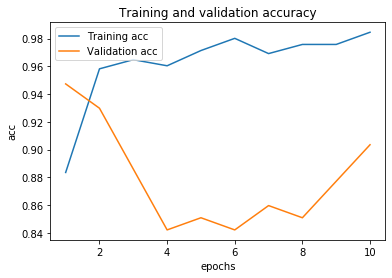

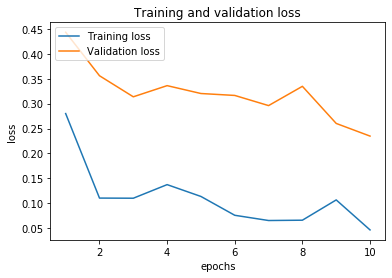

In [39]:
plot_result(history, epochs)